<a href="https://colab.research.google.com/github/Meghanah97/Individual-project-hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [84]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly 
import plotly.express as px

In [2]:
#read csv file
Hotel_df=pd.read_csv('/content/Hotel Bookings.csv')

In [3]:
Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
Hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


we can see that some columns like Agent, Company, country and children have null values.

In [9]:
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
#checking column values of Hotel booking dataframe
Hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
Hotel_df.shape

(119390, 32)

With above exploration Hotel booking dataframe has 119390 rows and 32 columns.

In [12]:
Hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [13]:
Hotel_df['is_canceled'].unique()

array([0, 1])

In [14]:
Hotel_df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [15]:
Hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [16]:
Hotel_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [17]:
Hotel_df['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [18]:
Hotel_df['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [19]:
Hotel_df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [20]:
Hotel_df['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [21]:
Hotel_df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [22]:
Hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [23]:
Hotel_df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [24]:
Hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [25]:
Hotel_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [26]:
Hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [27]:
Hotel_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [28]:
Hotel_df['is_repeated_guest'].unique()

array([0, 1])

In [29]:
Hotel_df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [30]:
Hotel_df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [31]:
Hotel_df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [32]:
Hotel_df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [33]:
Hotel_df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [34]:
Hotel_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [35]:
Hotel_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [36]:
Hotel_df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [37]:
Hotel_df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

In [38]:
Hotel_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [39]:
Hotel_df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [40]:
Hotel_df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [41]:
Hotel_df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [42]:
Hotel_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [43]:
Hotel_df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [44]:
# Creating a copy of dataframe
df= Hotel_df.copy()


# HotelBooking dataframe columns are:
* hotel: It has values Resort or City Hotel
* is_cancelled: It consist two values 1 indicates canceled and 0 indicates not cancelled
* lead_time: Number of days elapsed between the entering date of the booking and the arrival date
* arrival_date_year: It has year of arrival date
* arrival_date_month: It has month of arrival date
* arrival_date_week_number: It has week number of year for arrival date
* arrival_date_day_of_month: It has day of arrival date
* stays_in_weekend_nights: It has number of weekend nights.
* stays_in_week_nights: It has number of weekend nights.
* adults: It has value for number of adults.
* children: It has value for number children.
* babies: It has value number of babies.
* meal: It has value for type of meal booked.
* country: It has country origin.
* market_segment: 
* distribution_channel
* is_repeated_guest
* previous_cancellations
* previous_bookings_not_cancelled
* reserved_room_type
* assigned_room_type
* booking_changes
* deposit_type
* agent
* company
* days_in_waiting_list
* customer_type
* adr
* required_car_parking_spaces
* total_of_special_requests
* reservation_status
* reservation_status_date

## **Cleaning Data**
Removing unwanted values,unwanted outliers, replacing missing values

In [45]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we can see null values in children, country, agent and company

In [46]:
df[['company','agent']] = Hotel_df[['company','agent']].fillna(0)

In [47]:
df['children'].fillna(df['children'].mean(), inplace = True)

In [48]:
df['country'].fillna('others', inplace = True)

In [67]:
#outlier removing
df.drop(df[df['adr'] > 5000].index, inplace = True)

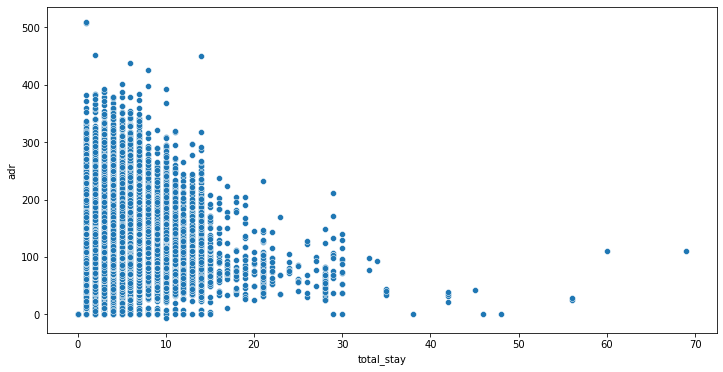

In [68]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
#checking duplicates value
df[df.duplicated()].shape

(31994, 32)

In [52]:
# Dropping duplicate value
df.drop_duplicates(inplace = True)

In [53]:
df['children'].fillna(df['children'].mean(), inplace = True)

In [54]:
df['country'].fillna('others', inplace = True)

In [55]:
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [57]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

In [58]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [59]:
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [60]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

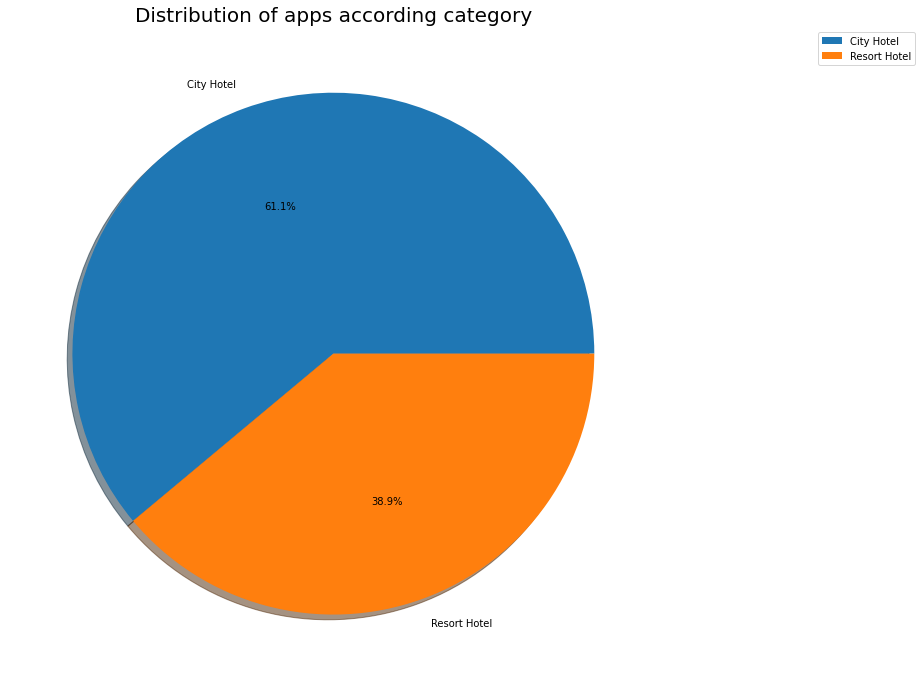

In [62]:
temp = df['hotel'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['hotel'], labels= temp['index'],autopct= '%1.1f%%',shadow=True)
plt.legend()
plt.title('Distribution of apps according category',size = 20);
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

In [ ]:
a = df['Content Rating'].value_counts().index
b = df['Content Rating'].value_counts()

asis = []
bsis = []
for i in range(len(a)):
    asis.append(a[i])
    bsis.append(b[i])

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(asis,bsis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
sns.set_theme(style="white")
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

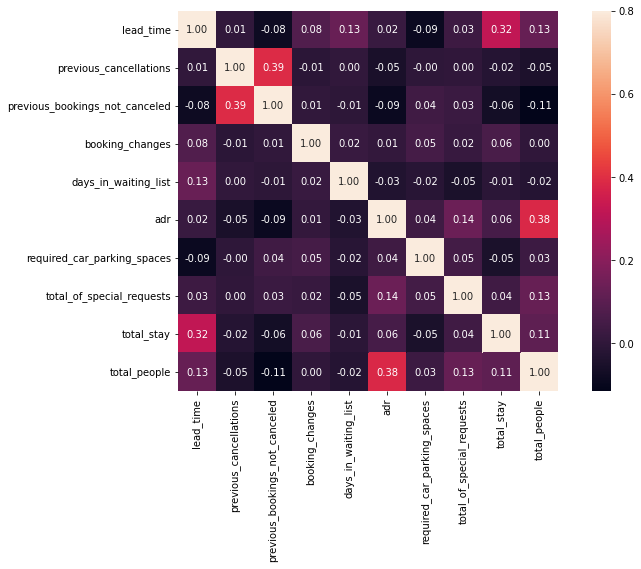

In [66]:
df1 = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]
#correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

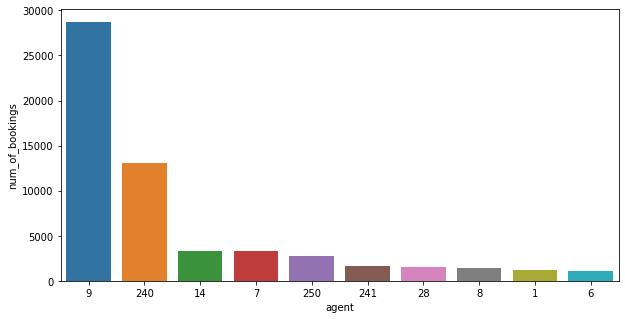

In [70]:
temp = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
temp.drop(temp[temp['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
temp = temp[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = temp, order = temp.sort_values('num_of_bookings', ascending = False).agent)

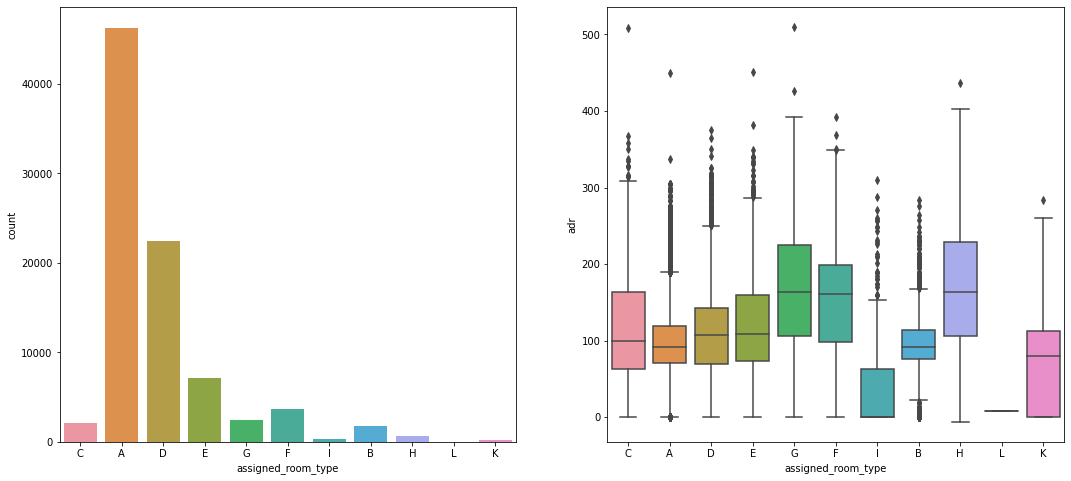

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
temp['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()


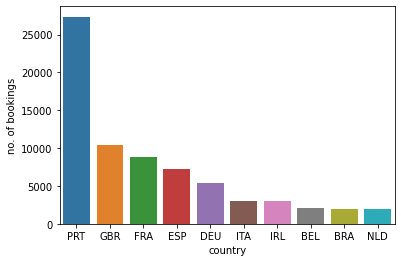

In [73]:
grp_by_country = df.groupby('country')
temporar = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
temporar = temporar[:10]
sns.barplot(x = temporar.index, y = temporar['no. of bookings'])
plt.show()

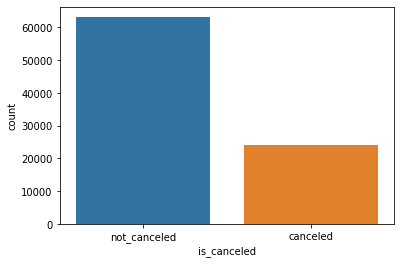

In [76]:
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df['is_canceled']
sns.countplot(canceled_data)

City hotels are more cancelled bookings. Now, plot the same with bar chart

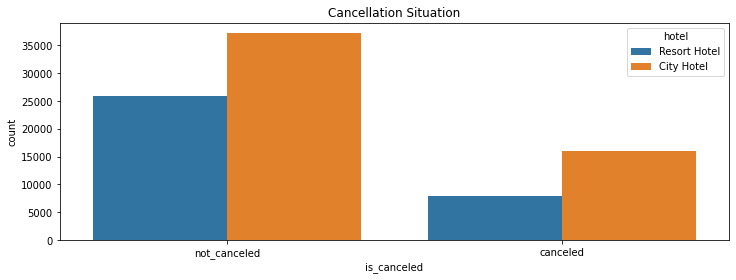

In [79]:
plt.figure(figsize=(12,4))
sns.countplot(x='is_canceled', hue = 'hotel', data= df)
plt.title('Cancellation Situation')
plt.show()

Making a data frame containing rows with top 10 countries only.

In [82]:
top10 = df[df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL",
                         "BEL","BRA","NLD"])]

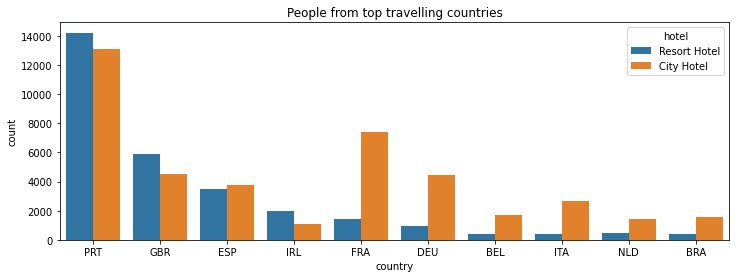

In [83]:
plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = 'hotel', data= top10)
plt.title('People from top travelling countries')
plt.show()

In [85]:
temp = df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,
                          locations=temp['country'],
                          color=np.log(temp['count']), 
                          hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title="Home country of guests")
guest_map.show()

we will calculate the average fees of the hotel.

In [86]:
# selecting all the rows without zero values
df = df.loc[(df.children != 0)|(df.babies != 0)|(df.adults != 0), :]
# Average hotel fees per person
df['adr_per_person'] = df['adr']/(df['adults'] + df['children'])
resort_mean = df.loc[(df.is_canceled == 0) & (df.hotel == 'Resort Hotel'), 'adr_per_person'].mean()
city_mean = df.loc[(df.is_canceled == 0) & (df.hotel == 'City Hotel'), 'adr_per_person'].mean()
print("The mean price of Resort hotel is {:.2f}".format(resort_mean))
print ("The mean price of city hotel is {:.2f}".format(city_mean))

The mean price of Resort hotel is nan
The mean price of city hotel is nan
